# Linear Regression on the Closing Price of S&P 500

This notebook walks through collecting historical data on the S&P 500 from Yahoo Finance, performing initial exporatory analysis on the dataset, and creating a linear regression model to predict the closing price of the S&P 500.

# Importing necessary modules

We start by import the python packages needed for this project

In [66]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Getting S&P 500 Data

Using the yfinance package, we source information on the S&P 500 by passing its "SPY" ticker into the Ticker method of yfinance:

In [67]:
SP500 = yf.Ticker("SPY")
SP500.info

{'longBusinessSummary': 'The Trust seeks to achieve its investment objective by holding a portfolio of the common stocks that are included in the index (the “Portfolio”), with the weight of each stock in the Portfolio substantially corresponding to the weight of such stock in the index.',
 'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 545.34,
 'open': 543.7,
 'dayLow': 543.65,
 'dayHigh': 547.98,
 'regularMarketPreviousClose': 545.34,
 'regularMarketOpen': 543.7,
 'regularMarketDayLow': 543.65,
 'regularMarketDayHigh': 547.98,
 'trailingPE': 27.585367,
 'volume': 23025601,
 'regularMarketVolume': 23025601,
 'averageVolume': 57070816,
 'averageVolume10days': 50553340,
 'averageDailyVolume10Day': 50553340,
 'bid': 547.85,
 'ask': 547.83,
 'bidSize': 900,
 'askSize': 800,
 'yield': 0.0128,
 'totalAssets': 533350318080,
 'fiftyTwoWeekLow': 409.21,
 'fiftyTwoWeekHigh': 550.28,
 'fiftyDayAverage': 526.7564,
 'twoHundredDayAverage': 485.8625,
 'trailingAnnualDividendRate': 5.662,
 'trai

After collecting the information on the ticker, we download the available historical data on the S&P500, and create and pandas DataFrame from it. Note the "max" argument is passed in the period input of the history method. This gives us the maximum range of data available on this ticker. 

We than display the first five rows using the *head* method, general information on the new DataFrame and columns using the *info* method, as well as some exploratory statistics about each column using the *describe* method

In [68]:
history = SP500.history(period='max')

df = pd.DataFrame(history)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
1993-01-29 00:00:00-05:00,24.701657,24.701657,24.578764,24.684101,1003200,0.0,0.0,0.0
1993-02-01 00:00:00-05:00,24.701659,24.859665,24.701659,24.859665,480500,0.0,0.0,0.0
1993-02-02 00:00:00-05:00,24.842113,24.929895,24.789444,24.912338,201300,0.0,0.0,0.0
1993-02-03 00:00:00-05:00,24.947439,25.193227,24.929883,25.175671,529400,0.0,0.0,0.0
1993-02-04 00:00:00-05:00,25.263457,25.333682,24.982557,25.281013,531500,0.0,0.0,0.0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7911 entries, 1993-01-29 00:00:00-05:00 to 2024-07-01 00:00:00-04:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           7911 non-null   float64
 1   High           7911 non-null   float64
 2   Low            7911 non-null   float64
 3   Close          7911 non-null   float64
 4   Volume         7911 non-null   int64  
 5   Dividends      7911 non-null   float64
 6   Stock Splits   7911 non-null   float64
 7   Capital Gains  7911 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 556.2 KB


In [70]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
count,7911.000000,7911.000000,7911.000000,7911.000000,7.911000e+03,7911.000000,7911.0,7911.0
mean,146.962143,147.819611,146.023428,146.975911,8.418468e+07,0.012235,0.0,0.0
std,119.951300,120.574531,119.286419,119.985667,9.166583e+07,0.111350,0.0,0.0
min,24.385653,24.455873,24.052089,24.385658,5.200000e+03,0.000000,0.0,0.0
25%,70.557851,71.106306,70.037804,70.542854,1.042560e+07,0.000000,0.0,0.0
50%,93.781063,94.526485,93.018910,93.811203,6.323060e+07,0.000000,0.0,0.0
75%,187.876512,188.556634,186.907439,187.737938,1.144841e+08,0.000000,0.0,0.0
max,547.673123,550.280029,544.971846,546.726196,8.710263e+08,1.906000,0.0,0.0


# Visualizing data relationships

Using seaborn, we first can look at the correlation of columns in our S&P 500 DataFrame using the *corr* method using the heatmap method. 

**NOTE** when using seaborn and matplotlib, a dummy variable _ is used to capture the outputted axes description from the two packages so it does not appear above the image.

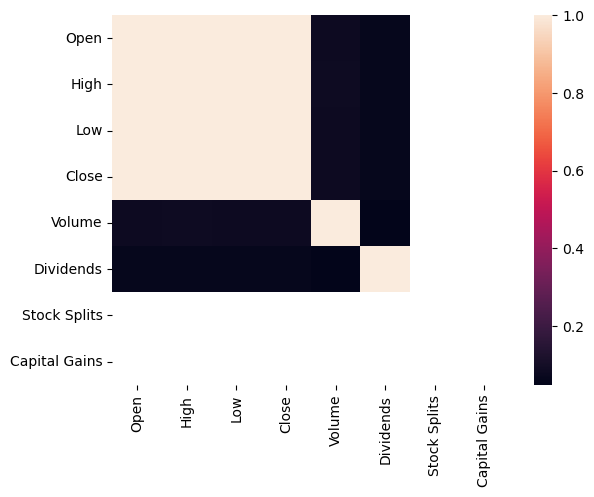

In [77]:
_ = sns.heatmap(df.corr())

A clear correlation exists between the Open, High, Low, and Close variables in the DataFrame, whil we see low correlation with Volume and Dividends with the rest of the DataFrame. It can also be noticed that the Stock Splits and Captital Gain variables are not displaying. If we look at the statistics generated above, this may have to do with them being zero for all entries in the DataFrame (we expect this with the S&P 500).

Using seaborn's *pairplot* method, we can display the scatter plots of the data against each other to explore the linearity of the relationships further:

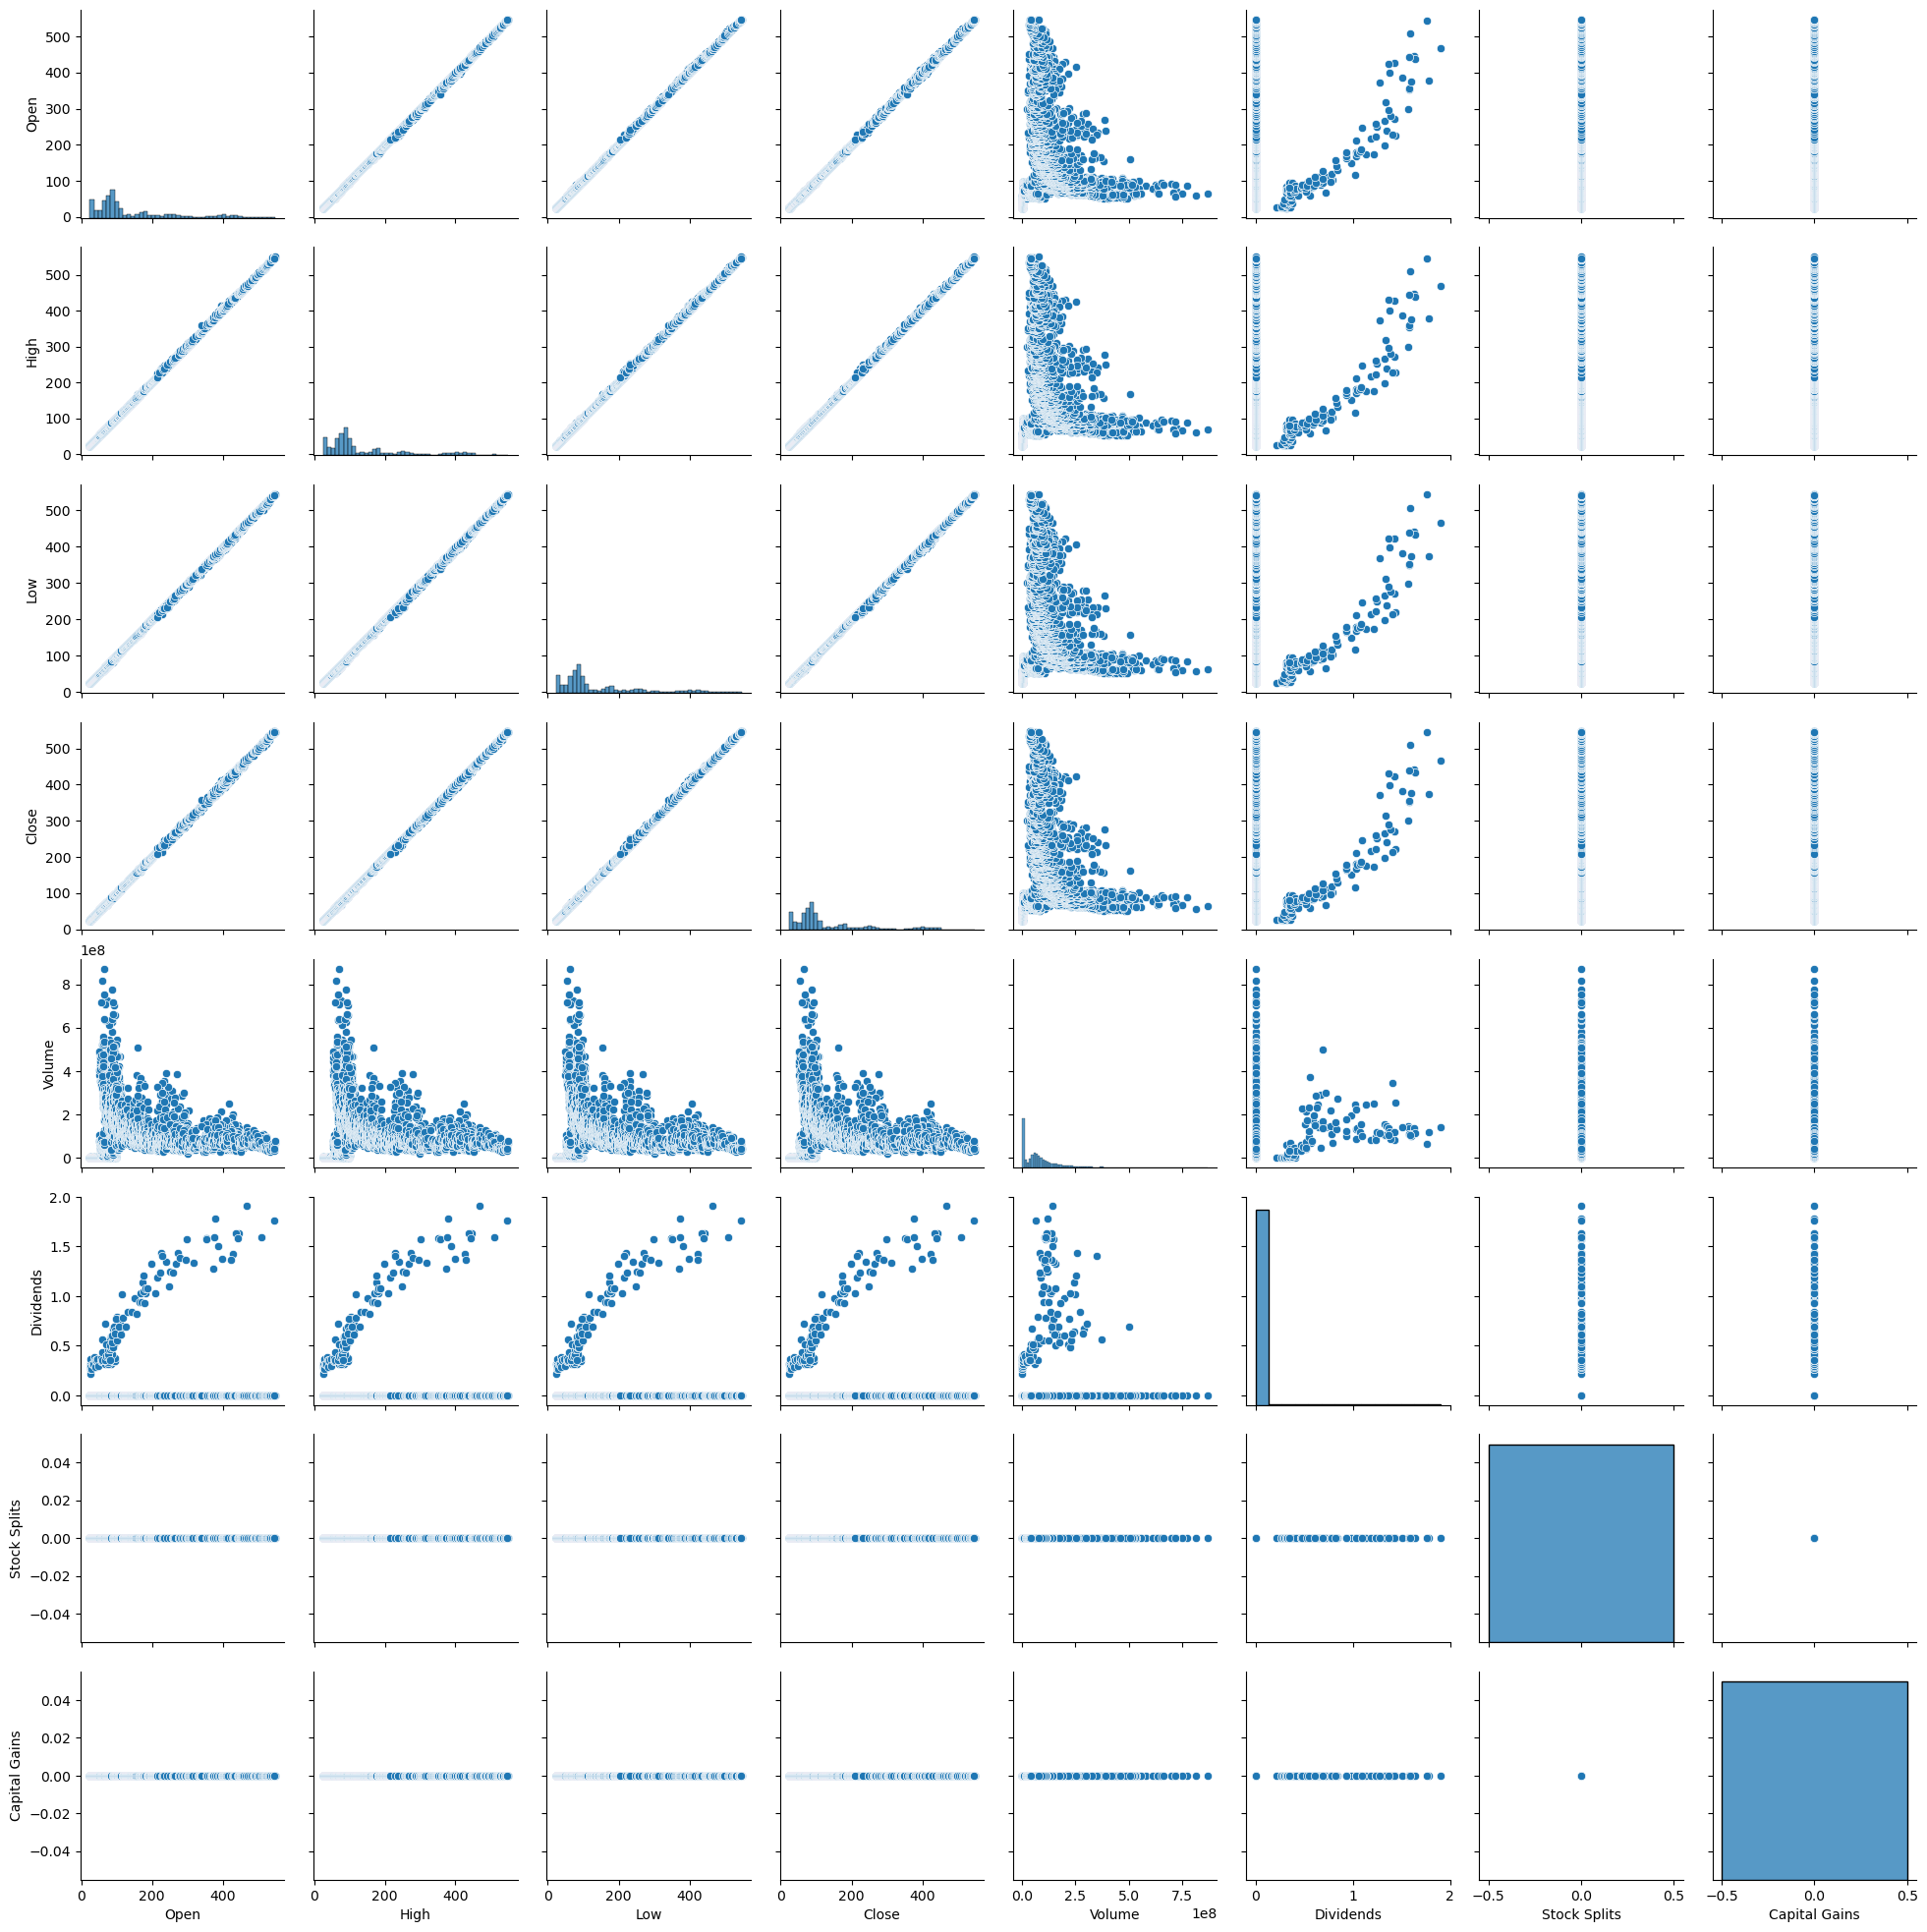

In [78]:
_ = sns.pairplot(df)

Can see strong linear relationships amongst the Open, High, Low, and Close variables, and a non-trivial relationship (fairly uncorrelated) with the Volumn variable. There appears to be some linear relationships when dividends are non-zero with the other variables, but considering that a majority of the data is 0 for dividends (and how stronly linear the other relationships are), this analysis will ignore dividends in our model analysis. Similarly, since Stock Split and Capital Gains are zero for all entries, they will also be ignored for the model analysis.

Below, the Capital Gains, Stock Splits, and Dividends columns are removed from the DataFrame, and the former two plots are visualized again with the adjusted DataFrame:

In [79]:
df = df.drop(
    ['Dividends','Stock Splits', 'Capital Gains'], 
    axis=1
)

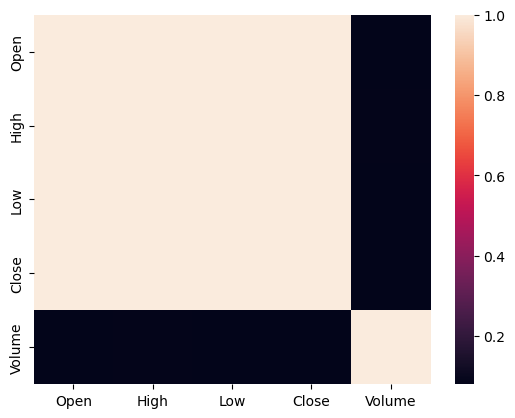

In [80]:
_ = sns.heatmap(df.corr())

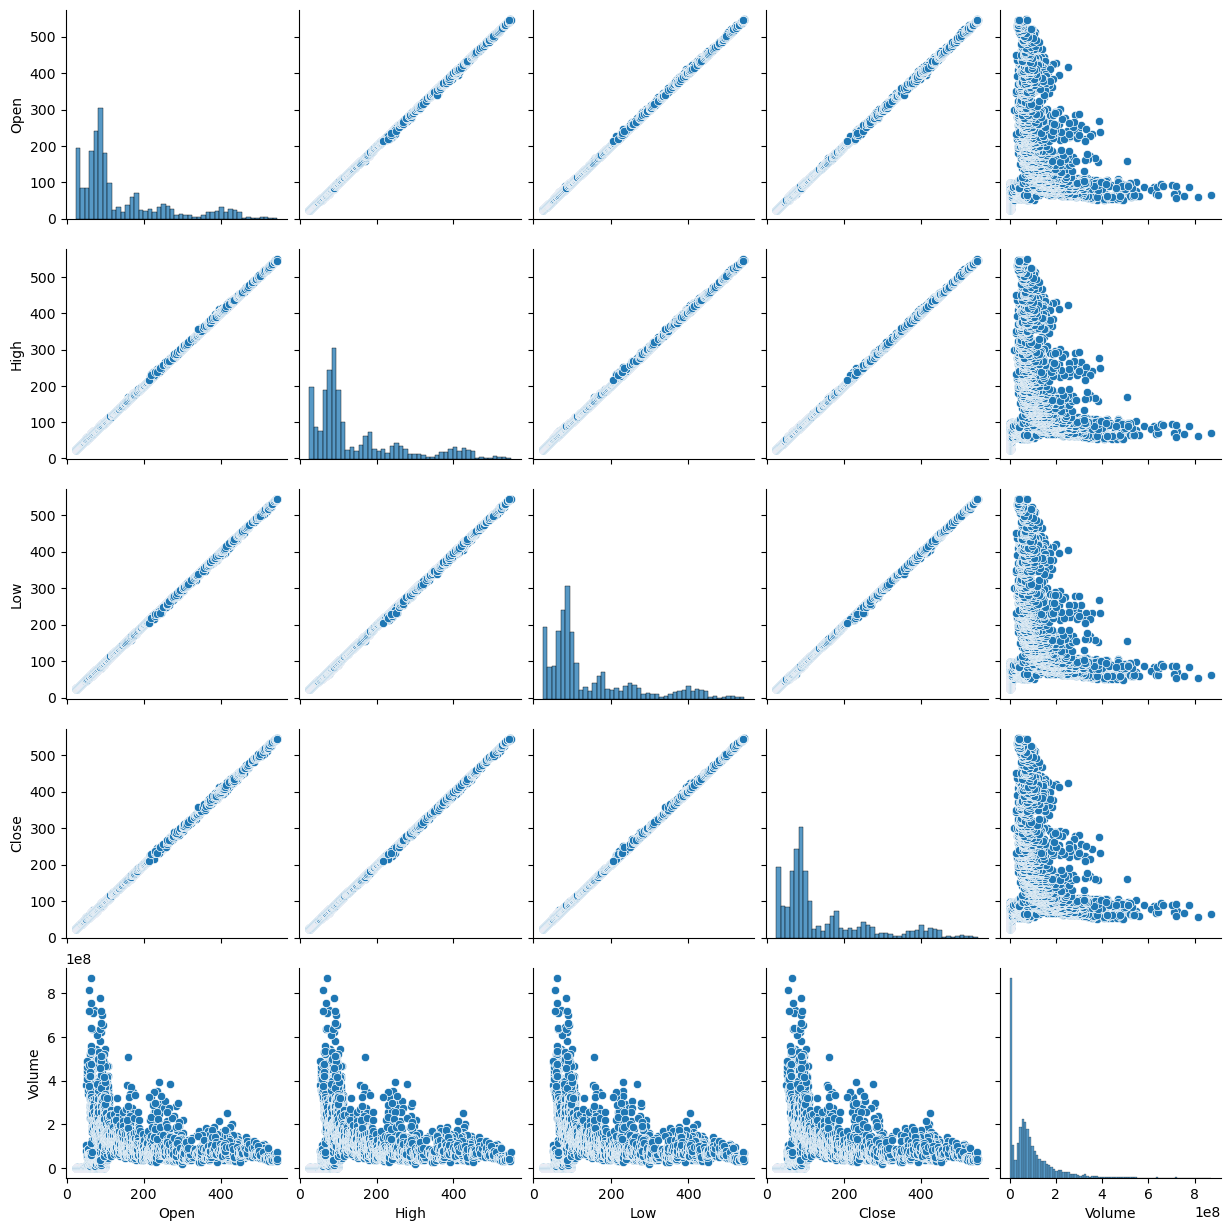

In [81]:
_ = sns.pairplot(df)

Finally, a histogram of the Close variable of the DataFrame is created to understand the distribution of the target variable. Looking at the plot it is a right-skewed distribution with several peaks.

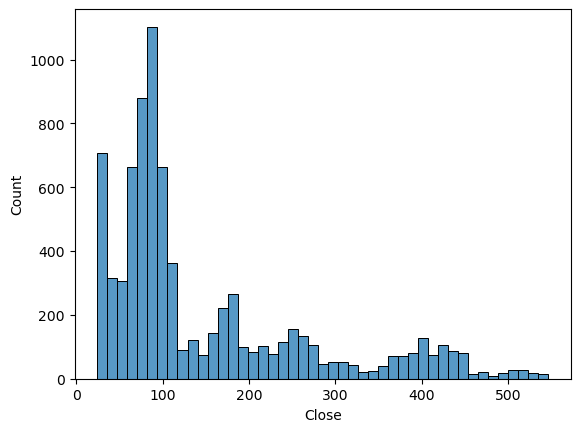

In [82]:
_ = sns.histplot(df['Close'])

# Creating the Model

Now that features of interest and a target variable have been established, the model for predicting the target can be created. In this analysis, a Linear Regression model will be used. Several modules in sci-kit learns *sklearn* package will be used for splitting data into training and testing sets, model creation and fitting, and performance evaluation.

First, the data must be split into training and testing data. The *sklearn.model_selection.train_test_split* module is used, where the training set will contain 80% of the data collected from Yahoo Finance, and the test set will contain the remaining 20%. Since the data is sequential, the *shuffle* argument has been set to **False**

In [83]:
X = df[['Open', 'High', 'Low', 'Volume']]
Y = df[['Close']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6328, 4)
(1583, 4)
(6328, 1)
(1583, 1)


After the data is split, the Linear Regressor model can be initialied using the *sklearn.linear_model.LinearRegression* object. This model is saved to the *regression* variable. Next, the training data is passed to the model object using the fit method, where the model will fit the data with a linear function.

Since we are passing this model four features for one output, we expect the model to return four coefficients corresponding to each of the features, in addition to an intercept term. Our equation should look like this:

$$
Closing = \alpha_1Opening + \alpha_2High + \alpha_3Low + \alpha_4Volume + \beta
$$

Where $\alpha_1, \alpha_2, \alpha_3, \alpha_4$ are the linear coefficients corresponding to the Open, High, Low, and Volume features of the DataFrame, and $\beta$ is the y-intercept.


After fitting the data the linear coefficients and the intercept of the function are printed to the console.

In [45]:
regression = LinearRegression()
regression.fit(X_train, Y_train)
print(regression.coef_, regression.intercept_)

[[-6.26260388e-01  8.20879504e-01  8.05746936e-01 -2.86052878e-11]] [0.00871294]


After fitting the model, we can first evaluate the $R^2$ score of the model on the test data by passing both the test features and test target to the *score* method of the *regression* object

In [47]:
regression_confidence = regression.score(X_test, Y_test)
print("Confidence of regression model: --- {x}".format(x=regression_confidence))

Confidence of regression model: --- 0.9996753314654305


With the high $R^2$ score indicating our features and model explain the variation in the target variable well, a prediction set of target variables can be generated by passing just the test feature dataset to the *predict* method of the *regression* object, and can evaluate the predictions based on the MAE, MSE, and RMSE scores:

In [86]:
predicted = regression.predict(X_test)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(Y_test, predicted))
print('Mean Squared Error (MSE) :', metrics.mean_squared_error(Y_test, predicted))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(Y_test, predicted)))

Mean Absolute Error (MAE): 1.009295815940639
Mean Squared Error (MSE) : 2.2448215202974047
Root Mean Squared Error (RMSE): 1.498272845745195


Using *matplotlib's* *scatter* method, the predicted closing price and actual closing price of the test set can be plotted to see how much variance there is between predicted and expected:

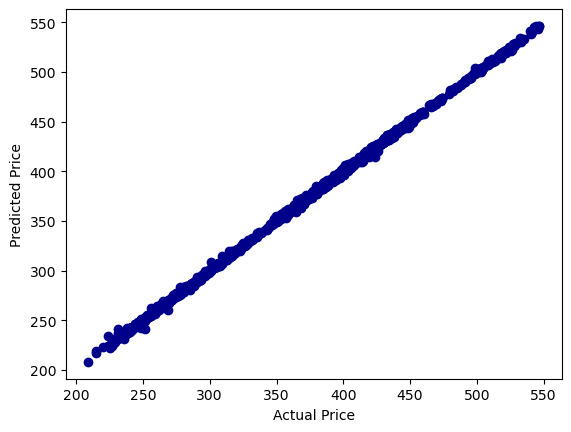

In [87]:
_ = plt.scatter(Y_test, predicted,  color='Darkblue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

Finally, the predicted and actual closing prices of the S&P 500 can be plotted with each other to see how well the predicted data follows the actual data's movement:

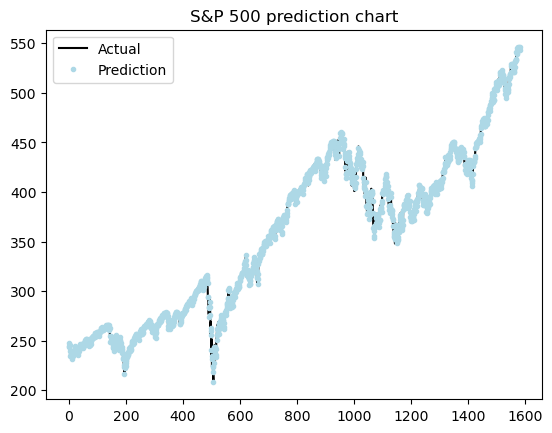

In [89]:
_ = plt.plot(range(len(Y_test)), Y_test, color='black',label='Actual')
_ = plt.plot(range(len(Y_test)), predicted, marker='.',linestyle='none',color='lightblue',label='Prediction')
plt.title("S&P 500 prediction chart")
plt.legend();

# Conclusion

Using Yahoo Finance, historical data on the S&P 500 was downloaded and turned into a pandas DataFrame. After performing some exploratory and graphical data analysis, features that showed strong correlation to the closing price of the S&P 500 were found, and deduced that the relationship might be able to be model via linear regression. 

After creating a regression model and training it, it was found that the models ability to accout for the variance in the target variable was high, and that the predicted data performed quite well against the actual closing prices of the S&P 500.